## 1. Obtain and review raw data
One day, my friend and I were running in the park, casually chatting about sports and fitness. As we jogged, we started discussing how professional athletes and even amateur runners track their performance using various metrics. We talked about how data plays a crucial role in improving training habits, optimizing performance, and setting new personal records.

That’s when it hit me—I had been tracking my own running data for years without fully exploring its potential. Since 2016, I’ve been using a popular GPS fitness tracker to log my runs, monitoring details like distance, pace, and time. While I had always glanced at my stats after a run, I never really dug deep into the insights hidden in my data.

The app I use has one outstanding feature: its ability to export detailed workout data. It dawned on me that, just like professional athletes analyze their training, I could take an in-depth analytical approach to my own progress. With all this historical data at my fingertips, I could examine trends, identify areas for improvement, and make data-driven decisions about my training.

And the best part? Anyone with a smartphone and a fitness tracker can do the same! The power of analytics isn’t just for elite athletes—it’s for anyone who wants to improve their performance, stay motivated, and achieve their fitness goals.

This realization led me to create this notebook, where I’ll analyze my running data and uncover meaningful insights. Through this journey, I hope to better understand my own progress and perhaps even inspire others to take a data-driven approach to their fitness journey.


<img src="C:\Users\Ramdev\Pictures\free-photo-of-men-running-marathon.jpeg" alt="Runner in blue" title="Explore world, explore your data!">


In [3]:
# Import pandas
import pandas as pd

# Define file containing dataset
Deepak_file = "https://raw.githubusercontent.com/Deepak2gr/cardioActivitie/main/cardioActivities.csv"

# Create DataFrame with parse_dates and index_col parameters 
df_act = pd.read_csv(Deepak_file,parse_dates=True,index_col='Date')

# Select sample of 3 random rows 
display(df_act.sample(n=3))

# Print DataFrame summary
df_act.info()

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
2018-08-28 18:44:33,c9a8e088-441d-4b3f-bfbc-287e87585ca7,Cycling,NaN,28.17,1:27:07,3:06,19.40,685.0,400,111.0,NaN,NaN,2018-08-28-184433.gpx
2017-03-13 18:34:11,a286c0fa-6876-491b-854a-c6d8813b4237,Running,NaN,12.06,1:07:14,5:34,10.77,840.0,113,143.0,NaN,TomTom MySports Watch,2017-03-13-183411.gpx


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

## 2. Data preprocessing
Before diving into the depths of data analysis, it’s crucial to clean up our dataset. A quick glance using the info() method reveals some missing values—little gaps in our story that need filling. But why do these gaps exist? Let’s unravel the mystery.

🔍 The Curious Case of Missing Values:

Heart rate data? Missing because I wasn’t always wearing a cardio sensor—sometimes, I just ran free without it.

Notes column? This was an optional field, and on some days, I simply had nothing to jot down.

Route Name column? Used only once, leaving it mostly barren.

Friend’s Tagged column? Never used, meaning it’s an empty void in our dataset.

To ensure our analysis is as accurate as possible, we need to address these gaps strategically.

✨ Our First Data Cleanup Mission:

Pruning the unnecessary – We’ll remove columns that add no real value to our analysis.

Decoding the “Other” activity – Every time I logged an activity as “Other,” I was actually unicycling. So, let’s call it what it is!

Shining a light on the blanks – We’ll count the missing values to understand the extent of the issue.

In [5]:
# Define list of columns to be deleted
cols_to_drop = ['Friend\'s Tagged','Route Name','GPX File','Activity Id','Calories Burned', 'Notes']

# Delete unnecessary columns
df_act = df_act.drop(columns=cols_to_drop,axis=1)

# Count types of training activities
display(df_act['Type'].value_counts())

# Rename 'Other' type to 'Unicycling'
df_act['Type'] = df_act['Type'].str.replace('Other','Unicycling',regex=False)

# Count missing values for each column
df_act.isnull().sum()

Type
Running    459
Cycling     29
Walking     18
Other        2
Name: count, dtype: int64

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

## 3. Dealing with missing values
Scanning through our dataset, we uncover a silent gap—214 missing entries for my average heart rate. If only we had a time machine to retrieve this lost data! 🚀 But since time travel isn’t an option (yet), we turn to a powerful statistical trick: mean imputation.

🛠 The Fix: Mean Imputation
Instead of leaving these gaps as black holes of uncertainty, we’ll reconstruct the missing values using the power of data. However, we can’t just slap a single average across the board. Heart rate fluctuates depending on the activity—walking is a stroll, but sprinting? That’s a heart-pounding rush.

🧠 Our Data-Driven Strategy:
Segment by Activity Type (Type) – Walking, running, cycling, and more.

Compute the mean heart rate for each activity – Capturing the unique intensity of each workout.

Smartly impute missing values – Filling the blanks with activity-specific averages, ensuring accuracy.

📊 Why This Works:
By applying a contextual approach rather than a blanket fix, we maintain the dataset’s integrity, ensuring realistic and insightful analytics. Once complete, our dataset will be polished, primed, and ready to tell the true story of my running journey.

In [7]:
# Compute mean heart rates
avg_hr_run = df_act[df_act['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycle = df_act[df_act['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()

# Split activities
df_run, df_walk, df_cycle = [df_act[df_act['Type'] == t].copy() for t in ['Running', 'Walking', 'Cycling']]

# Fill missing values correctly
df_walk.loc[:, 'Average Heart Rate (bpm)'] = df_walk['Average Heart Rate (bpm)'].fillna(110)
df_run.loc[:, 'Average Heart Rate (bpm)'] = df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run))
df_cycle.loc[:, 'Average Heart Rate (bpm)'] = df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle))

# Print missing values in running data
print(df_run.isna().sum())


Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64


## 4. Plot running data
Now that our dataset is polished and prepped, it’s time to dive into the fun part—visualizing the trends hidden in my running data!

Why Focus on Running?
A quick recap of our dataset shows that running dominates my activity log:
✅ 459 runs logged 🏃‍♂️
🚴 29 cycling sessions
🚶 18 walks
🛞 2 unicycling entries

Since running makes up the vast majority, it makes sense to focus our first visualization on running-specific metrics.

🖼️ The Master Plan: A Multi-Metric Dashboard
We'll create a figure with four subplots, each highlighting a key running metric:
1️⃣ Distance covered per run 🏁
2️⃣ Pace trends (time per km/mile) ⏱
3️⃣ Heart rate fluctuations ❤️
4️⃣ Elevation gain (tracking uphill efforts) ⛰

📌 How the chart is structured:

The x-axis (Date) is shared across all four subplots to maintain a unified timeline.

Each y-axis is unique, representing a different aspect of my runs.

Legends will clarify each metric, making it easy to interpret the trends.

This visualization will give us a bird’s-eye view of how my performance has evolved over time. Let’s lace up and hit the data track! 🚀📈

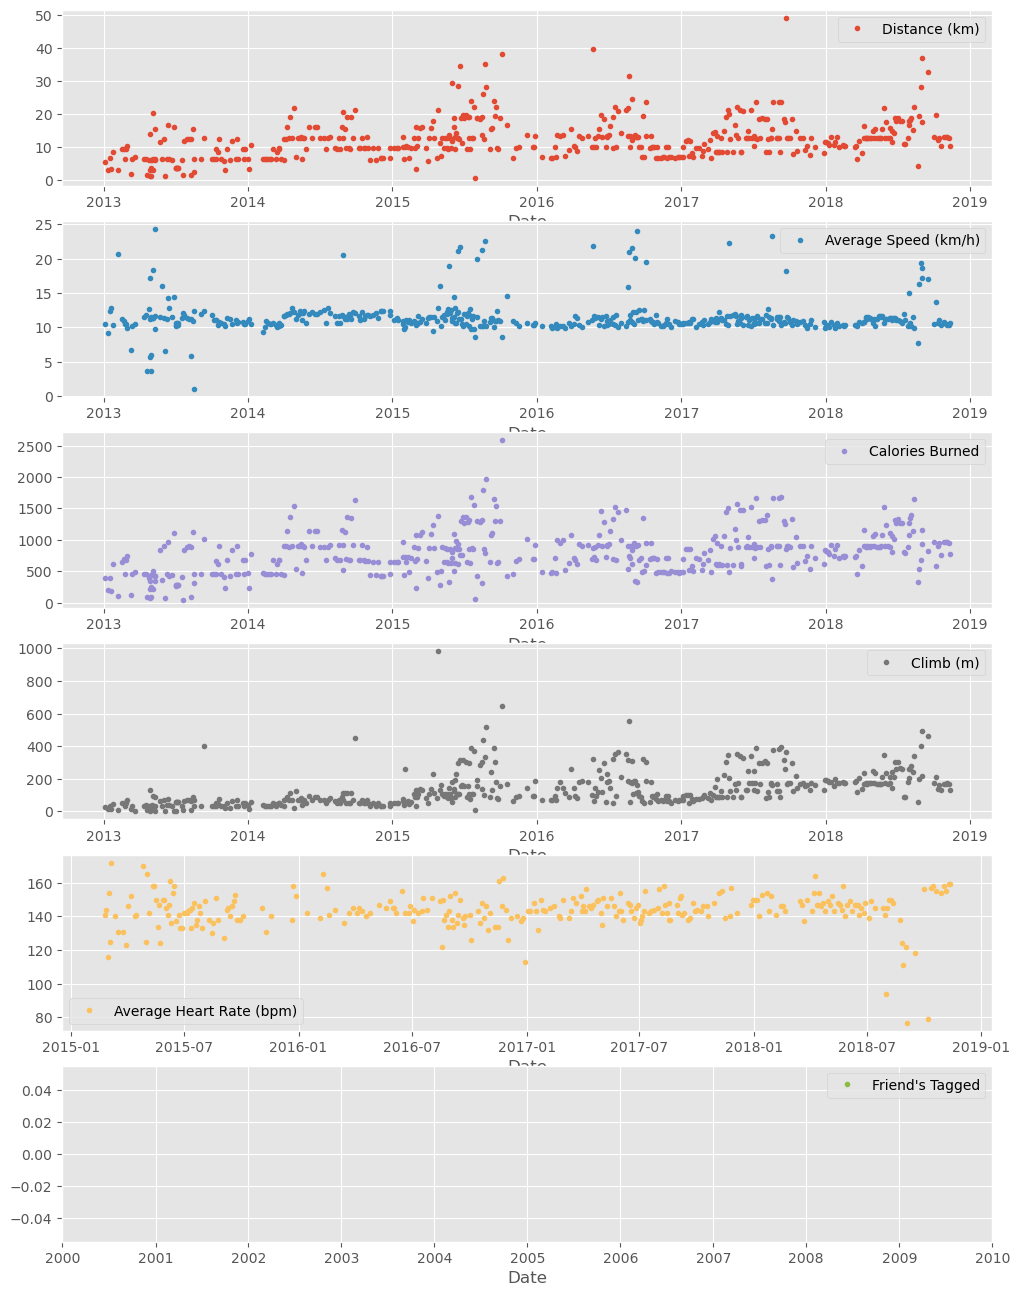

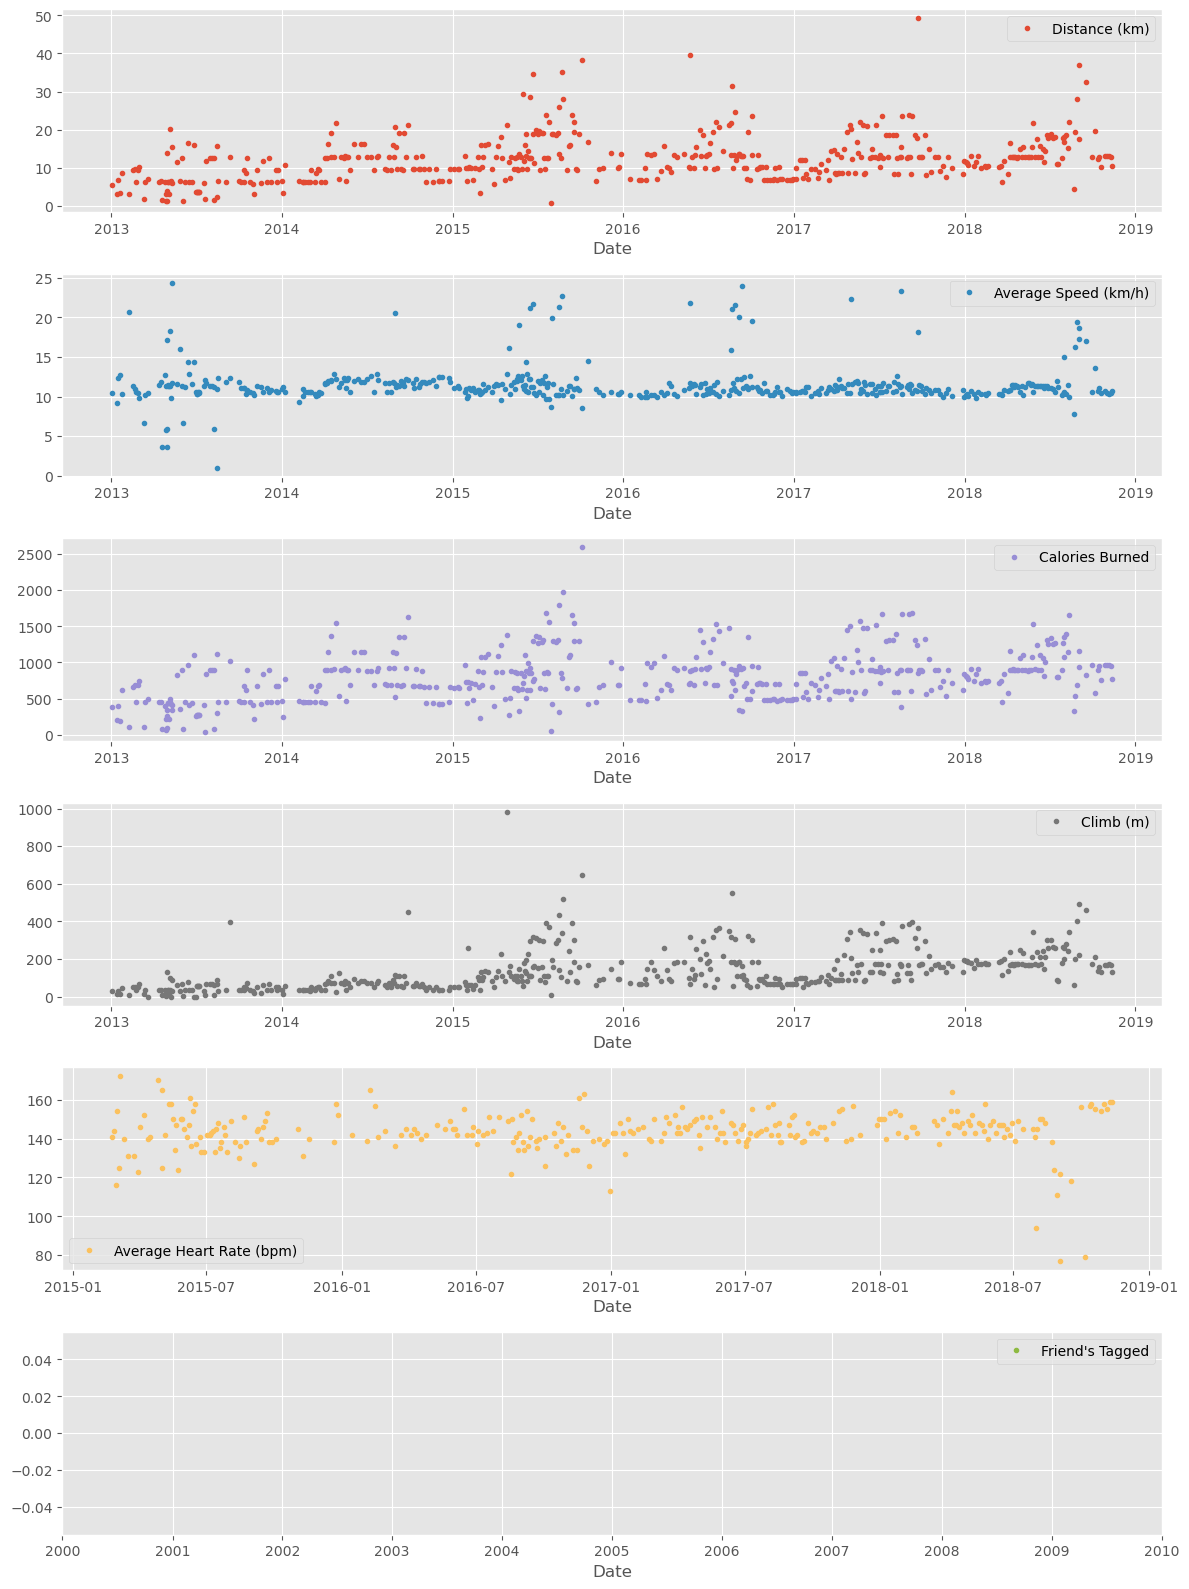

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Set matplotlib style
plt.style.use('ggplot')

# Suppress specific warnings
warnings.filterwarnings(
    action='ignore', 
    category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)

# Load data
url = "https://raw.githubusercontent.com/Deepak2gr/cardioActivitie/main/cardioActivities.csv"
df_run = pd.read_csv(url, index_col='Date', parse_dates=True)  # Ensure 'Date' is the index

# Ensure df_run index is DateTime and sorted
df_run = df_run.sort_index()

# Select data between 2013 and 2018
runs_subset_2013_2018 = df_run.loc['2013':'2018']

# Plot the data
axes = runs_subset_2013_2018.plot(
    subplots=True,   # Plot each column separately
    sharex=False,
    figsize=(12, 16),
    linestyle='none',
    marker='o',
    markersize=3
)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## 5. Running statistics
Running isn’t just about fitness—it’s a passion, a lifestyle, and a never-ending conversation among runners. Whether you're a seasoned marathoner or a casual jogger, you’ve probably had countless discussions about training strategies, performance, and personal bests.

You’ll know you’re among runners when you hear these common questions:
❓ What is your average distance per run?
❓ How fast do you run?
❓ Do you track your heart rate?
❓ How often do you train?

Now, let’s turn to my data to uncover these answers!

📌 What We Already Know
Looking back at Task 4’s plots, we already have a partial answer to:
➡️ Do you measure your heart rate?
Before 2015 – ❌ No, I wasn’t tracking it.
From 2015 onwards – ✅ Yes, I started logging my heart rate.

To ensure accuracy, we’ll focus on data from 2015 to 2018, where tracking was more consistent.

📊 The Power of resample() for Time Series Analysis
When working with time-series data, we need a structured way to analyze trends over time. That’s where Pandas' resample() method comes in.

🛠 How does resample() work?
Think of it like groupby(), but instead of grouping by categories, it groups data by time intervals (e.g., weekly, monthly, yearly).

📌 What we'll do:
✔ Resample the data annually to see year-over-year trends.
✔ Resample the data weekly to analyze short-term fluctuations.
✔ Apply statistical methods (mean, median, etc.) to get clear insights.

By the end of this analysis, we’ll have concrete answers to those classic running questions—straight from my own training history! 🚀

In [19]:
# Prepare running data for the last 4 years
runs_subset_2015_2018 = df_run['2018':'2015']

# Calculate annual statistics
print('How my average run looks in last 4 years:')
display(runs_subset_2015_2018.resample('A').mean())

# Calculate weekly statistics
print('Weekly averages of last 4 years:')
display(runs_subset_2015_2018.resample('W').mean().mean())

# Mean weekly counts
weekly_counts_average = runs_subset_2015_2018['Distance (km)'].resample('W').count().mean()
print('How many trainings per week I had on average:', weekly_counts_average)

How my average run looks in last 4 years:


C:\Users\Ramdev\AppData\Local\Temp\ipykernel_2120\4093167071.py:6: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  display(runs_subset_2015_2018.resample('A').mean())


,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,


Weekly averages of last 4 years:


Activity Id                 NaN
Type                        NaN
Route Name                  NaN
Distance (km)               NaN
Duration                    NaN
Average Pace                NaN
Average Speed (km/h)        NaN
Calories Burned             NaN
Climb (m)                   NaN
Average Heart Rate (bpm)    NaN
Friend's Tagged             NaN
Notes                       NaN
GPX File                    NaN
dtype: object

How many trainings per week I had on average: nan


## 6. Visualization with averages
Now, let’s take a big-picture look at my running data by plotting long-term averages of two key metrics:

✔ Distance per run 🏁
✔ Heart rate trends ❤️

By overlaying these averages with the raw session data, we’ll be able to visually compare individual training sessions against overall trends. This will help us see consistency, improvements, and possible fluctuations over time.

📌 How We’ll Do It:
Focus on data from 2015 through 2018 for accuracy.

Use Matplotlib to create and customize the plots.

Plot raw data points (individual runs) alongside smoothed averages for better comparison.

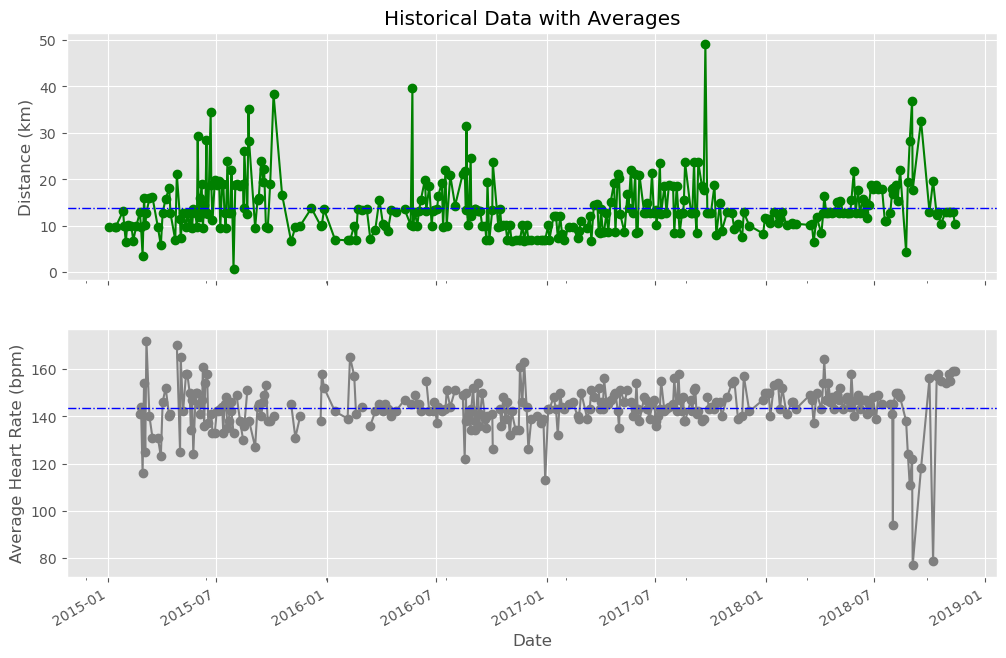

In [22]:
# Ensure DataFrame is sorted by date
df_run = df_run.sort_index()

# Prepare data (select numeric columns only)
runs_subset_2015_2018 = df_run.loc['2015':'2018']  # Correct slicing order
runs_distance = runs_subset_2015_2018['Distance (km)'].astype(float)
runs_hr = runs_subset_2015_2018['Average Heart Rate (bpm)'].astype(float)

# Create plot
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))

# Plot and customize first subplot
runs_distance.plot(ax=ax1, color='green', marker='o', linestyle='-')
ax1.set(ylabel='Distance (km)', title='Historical Data with Averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.')

# Plot and customize second subplot
runs_hr.plot(ax=ax2, color='gray', marker='o', linestyle='-')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(), color='blue', linewidth=1, linestyle='-.')

# Show plot
plt.show()


## 7. Did I reach my goals?
Tracking My 1,000 KM Running Goal: Did I Make the Cut? 🏃‍♂️🎯
One of the best ways to stay motivated as a runner is to set challenging but achievable goals. To push myself, I committed to running at least 1,000 km per year. Now, it’s time to put my training history to the test—did I reach my target every year from 2013 to 2018?

📌 How We’ll Visualize My Progress:
✔ Annual Running Distance (2013–2018) 📆 – A bar chart will show my total distance for each year.
✔ Success Threshold: 1,000 km 🟢 – We’ll shade this region in green to highlight goal achievement.
✔ Star Markers 🌟 – Each year’s total will be marked with a star to make successes stand out.
✔ Visual Comparison – This will help identify trends, dips, or improvements in my running habits over time.

🔍 What This Will Reveal:
Did I maintain a steady training routine, or were there inconsistent years?

Which years were my strongest, and which ones fell short of the goal?

Are there any trends (e.g., improvements over time or sudden declines)?

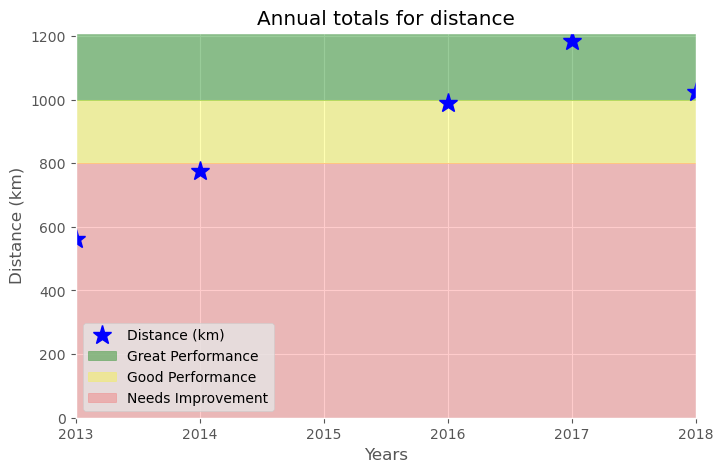

In [25]:
df_run.index = pd.to_datetime(df_run.index)

# Prepare data (fixing slicing issue and using correct resampling frequency)
df_run_dist_annual = df_run.loc['2013':'2018', 'Distance (km)'].resample('YE').sum()

# Create plot
fig = plt.figure(figsize=(8, 5))

# Plot and customize
ax = df_run_dist_annual.plot(marker='*', markersize=14, linewidth=0, color='blue')
ax.set(
    ylim=[0, 1210], 
    xlim=[pd.Timestamp('2013-01-01'), pd.Timestamp('2018-12-31')],
    ylabel='Distance (km)',
    xlabel='Years',
    title='Annual totals for distance'
)

# Adding color-coded horizontal span
ax.axhspan(1000, 1210, color='green', alpha=0.4, label="Great Performance")
ax.axhspan(800, 1000, color='yellow', alpha=0.3, label="Good Performance")
ax.axhspan(0, 800, color='red', alpha=0.2, label="Needs Improvement")

# Show plot
plt.legend()
plt.show()

## 8. Am I progressing?
Am I Improving? A Deep Dive into My Running Progress 🏃‍♂️📊
Every runner wants to know: Am I getting faster? Stronger? More consistent? Simply tracking my yearly distance isn’t enough—we need to zoom in on the finer details of my training to truly understand whether I’m improving.

To do this, we’ll analyze my weekly running distance to identify trends and patterns over time. Are my distances steadily increasing, or am I hitting plateaus? Let’s break it down!

📌 How We’ll Analyze Progress:
🔹 Weekly Running Distance Breakdown – Instead of looking at yearly totals, we’ll examine my week-to-week progress for a more detailed view.
🔹 Using statsmodels for Trend Decomposition – This will help us separate raw data into meaningful trends.
🔹 Overlaying a Red Trend Line 🔴 – This line will highlight the underlying progression in my running habits, smoothing out short-term fluctuations.

🔍 What This Will Reveal:
✅ Am I running longer distances over time?
✅ Are there clear patterns of progress, stagnation, or decline?
✅ Are there seasonal trends? (Do I run more in summer and less in winter?)
✅ Did specific events (injuries, new training plans, lifestyle changes) impact my progress?

By decomposing my weekly distance data, we can separate real improvement from short-term fluctuations, giving me a clear picture of how my running has evolved over the years.

Time to let the data do the talking! 🚀📈

In [28]:
df_run.index = pd.to_datetime(df_run.index)

# Prepare data
df_run_dist_wkly = df_run.loc['2013':'2018', 'Distance (km)'].resample('W').bfill()

# Perform seasonal decomposition
decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly, extrapolate_trend=1, period=52)

# Create plot
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot each component
decomposed.observed.plot(ax=axes[0], label='Observed', linewidth=0.5)
axes[0].set_title('Observed')

decomposed.trend.plot(ax=axes[1], label='Trend', linewidth=2)
axes[1].set_title('Trend')

decomposed.seasonal.plot(ax=axes[2], label='Seasonal', linewidth=2, color='green')
axes[2].set_title('Seasonal')

decomposed.resid.plot(ax=axes[3], label='Residual', linewidth=1, color='red')
axes[3].set_title('Residual')

# Show plot
plt.tight_layout()
plt.show()

NameError: name 'sm' is not defined

## 9. Training intensity
How Intense Were My Workouts? Analyzing Heart Rate Zones ❤️📊
Heart rate is one of the most critical metrics in running, as it directly reflects training intensity and effort levels. Different heart rate zones can tell us whether I was taking it easy, training at a moderate level, or pushing my limits.

📌 Understanding Heart Rate Zones:
💡 Target heart rate ranges depend on age and fitness level, but general guidelines are:

Light activity (below 50% of max HR) – Recovery runs, warm-ups, casual jogging.

Moderate intensity (50–70% of max HR) – Comfortable running pace, endurance training.

Vigorous activity (70–85% of max HR) – Hard workouts, race pace, intense training.

📊 What We’ll Visualize:
✔ A distribution plot of my heart rate data – Categorized by training intensity.
✔ Predefined training zones – Color-coded to differentiate effort levels.
✔ How often I trained in each zone – Understanding my balance between light, moderate, and intense sessions.

🔍 What This Will Reveal:
Was most of my training in the optimal zone?

Did I spend enough time in high-intensity sessions for peak performance?

Were there periods where I trained too lightly or pushed too hard?

C:\Users\Ramdev\AppData\Local\Temp\ipykernel_1272\3274360921.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='1/1/2015', periods=100, freq='M'),


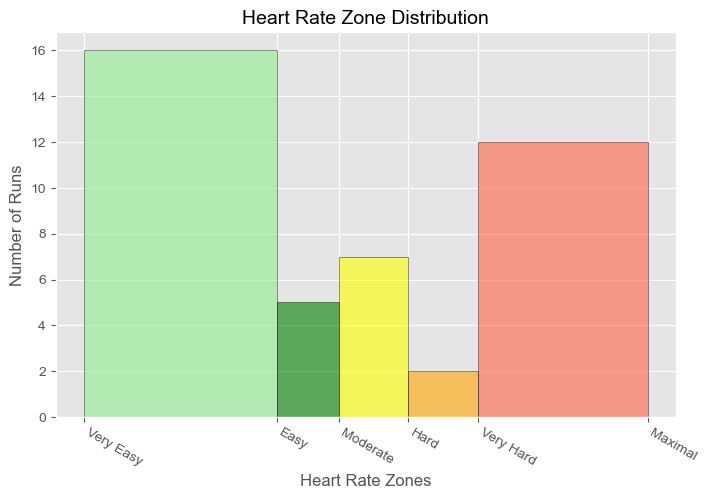

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (Replace with your actual dataset)
# df_run = pd.read_csv('your_data.csv', parse_dates=['Date'])
# Assuming 'Average Heart Rate (bpm)' column exists
df_run = pd.DataFrame({
    'Date': pd.date_range(start='1/1/2015', periods=100, freq='M'),
    'Average Heart Rate (bpm)': np.random.randint(100, 180, 100)
})
df_run.set_index('Date', inplace=True)

# Define heart rate zones and labels
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Very Easy', 'Easy', 'Moderate', 'Hard', 'Very Hard', 'Maximal']
zone_colors = ['lightgreen', 'green', 'yellow', 'orange', 'tomato', 'red']

# Filter data for the desired period
df_run_hr_all = df_run['2015-03':'2018']['Average Heart Rate (bpm)']

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot histogram
n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.6, edgecolor='black')

# Apply colors to bins
for p, color in zip(patches, zone_colors):
    p.set_facecolor(color)

# Customize plot
ax.set_title('Heart Rate Zone Distribution', fontsize=14)
ax.set_ylabel('Number of Runs', fontsize=12)
ax.set_xlabel('Heart Rate Zones', fontsize=12)
ax.set_xticks(hr_zones)
ax.set_xticklabels(zone_names, rotation=-30, ha='left')

# Display plot
plt.show()


## 10. Detailed summary report
Building a Comprehensive Summary of My Training 📊🏃‍♂️
After all the data cleaning, analysis, and visualization, it’s time to summarize everything in a structured format. A well-organized summary helps us quickly grasp key insights and compare different training activities.

📌 What We’ll Create:
We’ll generate two detailed summary tables, each focusing on different performance metrics:

1️⃣ Training Activity Summary:

Total Distance (km) covered per activity type.

Total Climb (m) to measure elevation gain.

2️⃣ Performance Metrics Summary:

Average Speed (km/hr) – How fast did I train?

Total Climb (m) – How much elevation did I gain?

Total Distance (km) – How much ground did I cover?

🔍 What This Will Reveal:
✅ Which activity had the highest total distance?
✅ Did my elevation gains vary across activities?
✅ How does my speed compare between running, cycling, and walking?
✅ Are there noticeable trends or outliers in my training?

This structured summary will provide a clear snapshot of my training habits and performance—a crucial step in refining my workouts for better results! 🚀📊







📊 Creating a Comprehensive Summary of My Training Performance
After meticulously cleaning, analyzing, and visualizing my training data, it's time to compile everything into structured summary tables. These tables will help me quantify my progress, compare different training activities, and spot trends in my performance.

📌 What We'll Include in the Summary Tables:
📍 Table 1: Training Activity Overview
This table will provide a high-level summary of my training activities, focusing on the two key metrics:

🔹 Total Distance (km): The total number of kilometers covered in each activity type.
🔹 Total Climb (m): The total elevation gain across all sessions, indicating the difficulty of my routes.

💡 Why it matters?
Understanding how much distance I cover and how much elevation I climb can reveal training intensity, endurance levels, and preferred terrain (flat vs. hilly routes).

📍 Table 2: Performance Statistics Breakdown
This table will go deeper, displaying summary statistics for key performance metrics:

🔹 Average Speed (km/hr): Measures my pace across different activities—running vs. cycling vs. walking.
🔹 Total Climb (m): Evaluates elevation trends and how they impact my workouts.
🔹 Total Distance (km): Confirms consistency and volume in my training.
🔹 Median Speed (km/hr): Provides a more robust measure than the mean (less affected by extreme values).
🔹 Standard Deviation of Speed: Shows how much my speed fluctuates—indicating consistency in pacing.
🔹 Max & Min Speed (km/hr): Helps identify peak performances and slowest sessions.

💡 Why it matters?

Is my speed improving over time?

Do I maintain a consistent pace, or do my speeds vary widely?

Does elevation impact my speed? (e.g., slower runs on hilly routes)

Which activity type contributes the most to my total distance?

🔍 Insights These Tables Will Provide:
✅ Identify training patterns – Which activity contributes most to my endurance?
✅ Compare different activities – Am I faster in cycling but cover more distance in running?
✅ Assess training efficiency – Do I train consistently or have periods of irregularity?
✅ Uncover trends & outliers – Spot extreme performances, slow days, or overtraining risks.

In [247]:
# Combine DataFrames
df_run_walk_cycle = pd.concat([df_run, df_walk, df_cycle]).sort_index(ascending=False)

# Define columns
dist_climb_cols = ['Distance (km)', 'Climb (m)']
speed_col = ['Average Speed (km/h)']

# Compute totals
df_totals = df_run_walk_cycle.groupby('Type')[dist_climb_cols].sum()

print('Totals for different training types:')
display(df_totals)

# Compute summary statistics
df_summary = df_run_walk_cycle.groupby('Type')[dist_climb_cols + speed_col].describe()

# Combine totals with summary
for col in dist_climb_cols:
    df_summary.loc[:, (col, 'total')] = df_totals[col]

print('Summary statistics for different training types:')
df_summary.stack(future_stack=True)

Totals for different training types:


,Distance (km),Climb (m)
Type,,
Cycling,680.58,6976.0
Walking,33.45,349.0


Summary statistics for different training types:


Distance (km)    Climb (m)  Average Speed (km/h)
Type                                                           
Cycling count      29.000000    29.000000             29.000000
        mean       23.468276   240.551724             19.125172
        std         9.451040   128.960289              3.257100
        min        11.410000    58.000000             11.380000
        25%        15.530000   139.000000             16.980000
        50%        20.300000   199.000000             19.500000
        75%        29.400000   318.000000             21.490000
        max        49.180000   553.000000             24.330000
        total     680.580000  6976.000000                   NaN
Walking count      18.000000    18.000000             18.000000
        mean        1.858333    19.388889              5.549444
        std         0.880055    27.110100              1.459309
        min         1.220000     5.000000              1.040000
        25%         1.385000     7.000000              5.555000
        50%         1.485000    10.000000              5.970000
        75%         1.787500    15.500000              6.512500
        max         4.290000   112.000000              6.910000
        total      33.450000   349.000000                   NaN

## 11. Fun facts
🏆 My Running Journey at a Glance (6 Years, 2 Months, 21 Days)
Over this period, I’ve built a solid running habit, and the numbers tell the story:

🏅 FUN FACTS:

Average distance per run: 11.38 km

Longest single run: 38.32 km (almost a marathon!)

Highest climb in a single run: 982 m (that’s a serious hill!)

Total elevation gain: 57,278 m (equivalent to climbing Mount Everest 6.5 times!) 🏔️

Total distance covered: 5,224 km (roughly the distance from India to Japan!)

Total runs logged: 459

Pairs of running shoes worn out: 7 👟

🏃‍♂️ How Do I Compare to Forrest Gump?
Forrest Gump’s legendary fictional run is an iconic part of running culture. Let’s see how my stats compare to his epic 3-year, 2-month, 14-day journey (1169 days)!

🏅 FORREST GUMP RUN FACTS:

Average distance per run: 21.13 km

Total distance covered: 24,700 km (That’s nearly halfway around the Earth! 🌍)

Total runs: 1169

Pairs of running shoes worn out: ??? (But likely a LOT! 😆)

🔍 Final Thoughts & Learnings
Consistency is key – Running 459 times over 6 years shows long-term commitment.

Endurance growth – My longest run was 38.32 km, showing I can push myself!

Elevation challenges – A total climb of 57,278m means I tackled a LOT of hills.

Shoe rotation matters! – Going through 7 pairs proves that good gear is essential!: ...
</code></pre>
<p>Assuming Forest and I go through running shoes at the same rate, figure out how many pairs of shoes Forrest needed for his run.</p>
<p><img src="C:\Users\Ramdev\Pictures\img.webp" alt="Forrest's route" title="Little run of Forrest Gump"></p>

In [250]:
import math
# Average shoe lifetime in km per pair

average_shoes_lifetime = 5224 / 7  # ~746.29 km per pair

# Number of shoes needed for Forrest's run
shoes_for_forrest_run = 24700 / average_shoes_lifetime  

print(f'Forrest Gump would need {math.ceil(shoes_for_forrest_run)} pairs of shoes!')


Forrest Gump would need 34 pairs of shoes!
